# **REGRESSÃO POLINOMIAL**

In [1]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vendas = pd.read_excel('/content/drive/MyDrive/FIAP/Script/comissao.xlsx')

## **ANÁLISE INICIAL**

In [ ]:
vendas.head(20)

quantidade  comissao
0            1       728
1            2       762
2            3       802
3            4       848
4            5       900
5            6       958
6            7      1022
7            8      1092
8            9      1168
9           10      1250
10          11      1338
11          12      1432
12          13      1532
13          14      1638
14          15      1750
15          16      1868
16          17      1992
17          18      2122
18          19      2258
19          20      2400

In [ ]:
vendas.shape

(50, 2)

In [ ]:
vendas.dtypes

quantidade    int64
comissao      int64
dtype: object

In [ ]:
vendas = vendas.astype({"comissao": float})

In [ ]:
vendas.dtypes

quantidade      int64
comissao      float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.title('Correlação')
plt.xlabel('Quantidade')
plt.ylabel('Comissão')
plt.grid(True)
plt.show()

# **REGRESSÃO LINEAR**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
# Criação do modelo
regressao = smf.ols('comissao ~ quantidade', data = vendas).fit()

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Sun, 12 May 2024   Prob (F-statistic):           5.98e-34
Time:                        22:29:31   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

In [ ]:
regressao.params

Intercept    -626.0
quantidade    178.0
dtype: float64

**Equação: Comissão = -626 + 178.quantidade**

**R^2 ajustado = 0,954**

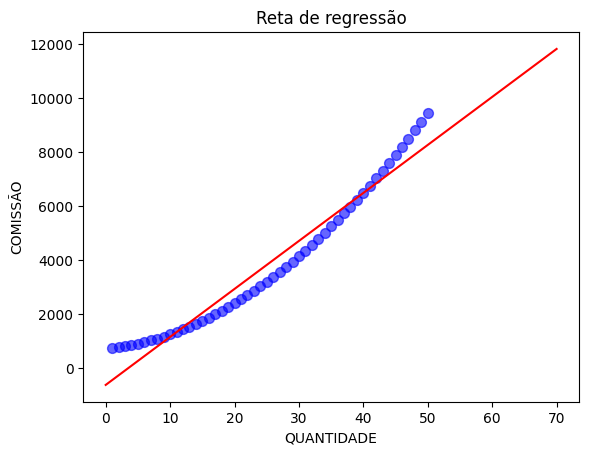

In [ ]:
plt.scatter(y=vendas.comissao, x=vendas.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 70)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('COMISSÃO')
plt.xlabel('QUANTIDADE')
plt.show()

# **REGRESSÃO POLINOMIAL - GRAU 2**

**y = b2.x^2 + b1.x + b0**

In [ ]:
modelo2 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 2))

In [ ]:
y2 = modelo2(vendas.quantidade)
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [ ]:
modelo2.coef

array([  3.,  25., 700.])

In [ ]:
print("Equação: COMISSÃO = {:.1f}*quantidade^2 + {:.1f}*quantidade + {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: COMISSÃO = 3.0*quantidade^2 + 25.0*quantidade + 700.0


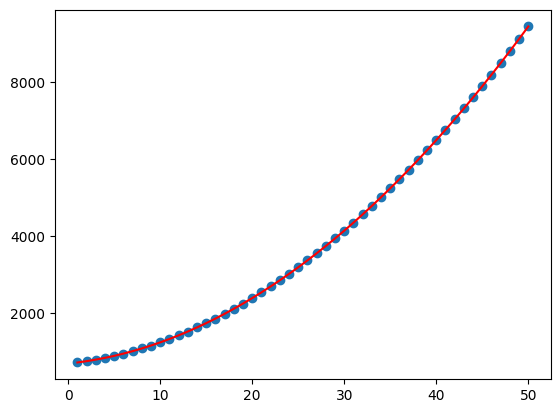

In [ ]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y2,color='red');


In [ ]:
# Coeficiente de determinação
np.corrcoef(modelo2)**2

1.0

# **REGRESSÃO POLINOMIAL - GRAU 3**

**y = b3.x^3 + b2.x^2 + b1.x + b0**

In [ ]:
modelo3 = np.poly1d(np.polyfit(vendas.quantidade, vendas.comissao, 3))

In [ ]:
y3 = modelo3(vendas.quantidade)
y3

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [ ]:
modelo3.coef

array([3.78115434e-17, 3.00000000e+00, 2.50000000e+01, 7.00000000e+02])

In [ ]:
print("Equação: COMISSÃO = {:.1f}*quantidade^3 + {:.1f}*quantidade^2 + {:.1f}*quantidade + {:.1f}".format(modelo3.coef[3], modelo3.coef[2], modelo3.coef[1], modelo3.coef[0]))

Equação: COMISSÃO = 700.0*quantidade^3 + 25.0*quantidade^2 + 3.0*quantidade + 0.0


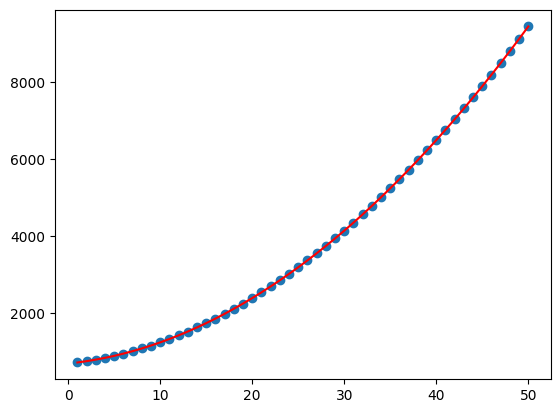

In [ ]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade,y3,color='red');

In [ ]:
# Coeficiente de determinação
np.corrcoef(modelo3)**2

1.0

# **REGRESSÃO EXPONENCIAL**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
modelo_exp = smf.ols('np.log(comissao) ~ quantidade', data=vendas).fit()

In [ ]:
# Criar função exponencial
def funcao_exponencial(x, a, b):
  return np.exp(a + b * x)

In [ ]:
print(modelo_exp.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(comissao)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4756.
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.13e-49
Time:                        22:52:05   Log-Likelihood:                 56.653
No. Observations:                  50   AIC:                            -109.3
Df Residuals:                      48   BIC:                            -105.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6313      0.023    290.377      0.0

In [ ]:
# Equação Exponencial
equacao_exp = f"comissão = exp({modelo_exp.params[0]:.4f} + {modelo_exp.params[1]:.4f} * quantidade)"
print(f"Equação exponencial: {equacao_exp}")

Equação exponencial: comissão = exp(6.6313 + 0.0538 * quantidade)


In [ ]:
# Criar coluna com valores previstos
vendas['comissao_prevista'] = funcao_exponencial(vendas.quantidade, modelo_exp.params[0], modelo_exp.params[1])
vendas.head(10)

quantidade  comissao  comissao_prevista  comissao_prevista_log
0           1     728.0         800.341377           -3303.440929
1           2     762.0         844.537044           -1618.994905
2           3     802.0         891.173241            -633.657147
3           4     848.0         940.384736              65.451119
4           5     900.0         992.313740             607.721618
5           6     958.0        1047.110317            1050.788877
6           7    1022.0        1104.932816            1425.396907
7           8    1092.0        1165.948333            1749.897143
8           9    1168.0        1230.333189            2036.126636
9          10    1250.0        1298.273442            2292.167642

In [ ]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, vendas['comissao_prevista'], color='red')
plt.title('Regressão Exponencial')
plt.xlabel('Quantidade')
plt.ylabel('Comissão');

# **REGRESSÃO LOGARÍTMICA**

In [ ]:
# Criar modelo de regressão logarítmica
modelo_log = smf.ols('comissao ~ np.log(quantidade)', data=vendas).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     94.08
Date:                Sun, 12 May 2024   Prob (F-statistic):           6.81e-13
Time:                        22:32:17   Log-Likelihood:                -437.53
No. Observations:                  50   AIC:                             879.1
Df Residuals:                      48   BIC:                             882.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3303.4409    775

In [ ]:
# Equação logarítmica
equacao_log = f"comissão = {modelo_log.params[0]:.3f} + {modelo_log.params[1]:.3f} * log(quantidade)"

print(f"Equação logarítmica: {equacao_log}")

Equação logarítmica: comissão = -3303.441 + 2430.142 * log(quantidade)


In [ ]:
def funcao_logaritmica(x, a, b):
  return a + b * np.log(x)

In [ ]:
# Criar coluna com valores previstos
vendas['comissao_prevista_log'] = funcao_logaritmica(vendas.quantidade, modelo_log.params[0], modelo_log.params[1])
vendas.head(10)

quantidade  comissao  comissao_prevista  comissao_prevista_log
0           1     728.0         800.341377           -3303.440929
1           2     762.0         844.537044           -1618.994905
2           3     802.0         891.173241            -633.657147
3           4     848.0         940.384736              65.451119
4           5     900.0         992.313740             607.721618
5           6     958.0        1047.110317            1050.788877
6           7    1022.0        1104.932816            1425.396907
7           8    1092.0        1165.948333            1749.897143
8           9    1168.0        1230.333189            2036.126636
9          10    1250.0        1298.273442            2292.167642

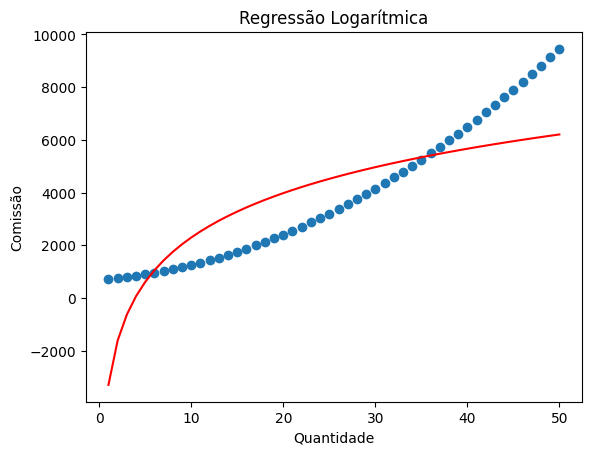

In [ ]:
plt.scatter(vendas.quantidade, vendas.comissao)
plt.plot(vendas.quantidade, vendas['comissao_prevista_log'], color='red')
plt.title('Regressão Logarítmica')
plt.xlabel('Quantidade')
plt.ylabel('Comissão');